In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib  import pyplot as plt

## Exploratory Data Analysis

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [5]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

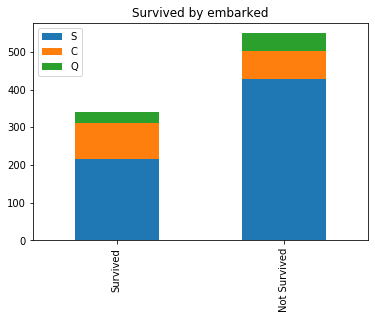

,S,C,Q
Survived,217,93,30
Not Survived,427,75,47


In [6]:
# Pclass
Survived = train_data[train_data.Survived == 1]['Embarked'].value_counts()
Died =(train_data[train_data.Survived == 0 ]['Embarked'].value_counts())
Gross = pd.DataFrame([Survived,Died])
Gross.index = ['Survived','Not Survived']
Gross.plot(kind = 'bar' , title = 'Survived by embarked' , stacked = True)
plt.show()
Gross

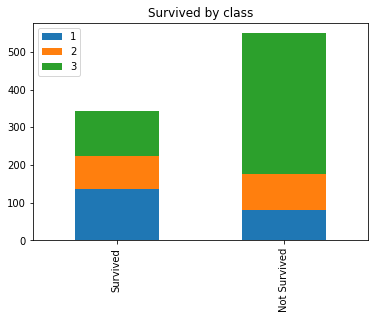

,1,2,3
Survived,136,87,119
Not Survived,80,97,372


In [7]:
# Pclass
Survived = train_data[train_data.Survived == 1]['Pclass'].value_counts()
Died =(train_data[train_data.Survived == 0 ]['Pclass'].value_counts())
Gross = pd.DataFrame([Survived,Died])
Gross.index = ['Survived','Not Survived']
Gross.plot(kind = 'bar' , title = 'Survived by class' , stacked = True)
plt.show()
Gross

In [8]:
# Total number of women survived {To check out some pattern in our dataset}
female = train_data.loc[train_data.Sex == 'female']['Survived']
count = sum(female)/len(female)
print('{0}% of women who survived'.format(count))

0.7420382165605095% of women who survived


In [9]:
# Total number of men survived
men = train_data.loc[train_data.Sex == 'male']['Survived']
count = sum(men)/len(men)
print('{0}% of men who survived'.format(count))

0.18890814558058924% of men who survived


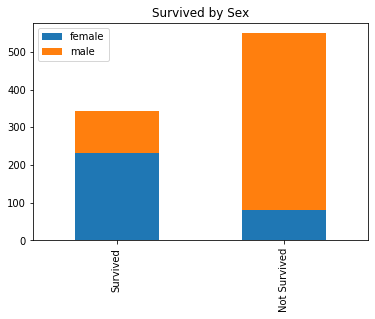

,female,male
Survived,233,109
Not Survived,81,468


In [10]:
# Total Surv
Surv =(train_data[train_data.Survived == 1 ]['Sex'].value_counts())
Died =(train_data[train_data.Survived == 0 ]['Sex'].value_counts())
Gross = pd.DataFrame([Surv , Died ])
Gross.index = ['Survived','Not Survived']
Gross.plot(kind = 'bar',stacked = True , title ='Survived by Sex')
plt.show()
Gross

## Feature Engineering

In [11]:
## Fix all missing values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_data.drop(['Cabin' , 'SibSp' , 'Parch' , 'Fare' , 'Ticket' ] , axis = 1 , inplace = True )
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Embarked         2
dtype: int64

In [13]:
## Fix all the Embarked value 
mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna( mode , inplace = True )
train_data['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [14]:
train_data
X = train_data.drop(['PassengerId' , 'Survived' ] , axis = 1)
y = train_data.Survived
X

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,C


In [15]:
## Encoding all the categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X.Sex = encoder.fit_transform(X.Sex)
X.Embarked = encoder.fit_transform(X.Embarked)
X

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,2
4,3,"Allen, Mr. William Henry",1,35.0,2
...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",1,27.0,2
887,1,"Graham, Miss. Margaret Edith",0,19.0,2
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,2
889,1,"Behr, Mr. Karl Howell",1,26.0,0


In [16]:
# To handle age we could either remove the label or replcae all the nan value with respect to..Mr. Mrs
X.loc[:,'Name'] = X.Name.str.split(', ').str[1].str.split('. ').str[0]
X.Name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [17]:
l = X.groupby('Name').mean()['Age']
mapp = {}
for k , title in enumerate(X['Name'].unique()):
    mapp[title] = l[k]
mapp

{'Mr': 70.0,
 'Mrs': 58.0,
 'Miss': 40.0,
 'Master': 42.0,
 'Don': 38.0,
 'Rev': 48.0,
 'Dr': 48.5,
 'Mme': 4.574166666666667,
 'Ms': 21.773972602739725,
 'Major': 24.0,
 'Lady': 24.0,
 'Sir': 32.368090452261306,
 'Mlle': 35.898148148148145,
 'Col': 28.0,
 'Capt': 43.166666666666664,
 'th': 49.0,
 'Jonkheer': 33.0}

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Jonkheer      1
Ms            1
th            1
Don           1
Mme           1
Capt          1
Lady          1
Name: Name, dtype: int64

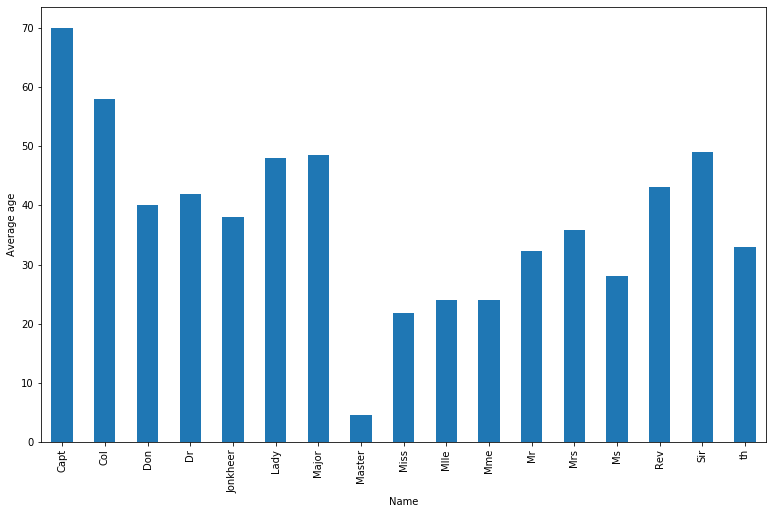

In [18]:
train_data.Name.value_counts()
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8) ,ax = ax)
X.Name.value_counts()

In [19]:
# Now add the value of missing age wrt to their title
for index in range( 0 , len(X)):
    if np.isnan(X.Age[index] ) == True:
        X.Age[index] = mapp[X.Name[index]]
        

C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Feature Scaling

In [20]:
copy = X.copy()
copy.drop('Name',axis = 1 , inplace = True)
from sklearn.preprocessing import StandardScaler
scle = StandardScaler()
copy = pd.DataFrame(scle.fit_transform(copy))
copy

,0,1,2,3
0,0.827377,0.737695,-0.738488,0.585954
1,-1.566107,-1.355574,0.098675,-1.942303
2,0.827377,-1.355574,-0.529197,0.585954
3,-1.566107,-1.355574,-0.058293,0.585954
4,0.827377,0.737695,-0.058293,0.585954
...,...,...,...,...
886,-0.369365,0.737695,-0.476875,0.585954
887,-1.566107,-1.355574,-0.895456,0.585954
888,0.827377,-1.355574,0.203320,0.585954
889,-1.566107,0.737695,-0.529197,-1.942303


In [21]:
X.drop('Name' , axis = 1 , inplace = True)
X.isna().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

## Model Selection

In [22]:
def model( X_train , y_train ):
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)

    ## Using Naive Bayes Algorithm to the Training Set
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,y_train)

     #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)

    ## Using KNN Algorithm to the Training Set
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train,y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
    tree.fit(X_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)

    print('[0]Logistic Regression Training Accuracy:', lr.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', nb.score(X_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    
    return lr , nb , svc_lin , svc_rbf , knn , tree , forest

In [23]:
complete = model(X ,y)
complete

C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0]Logistic Regression Training Accuracy: 0.792368125701459
[1]K Nearest Neighbor Training Accuracy: 0.835016835016835
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7867564534231201
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8630751964085297
[4]Gaussian Naive Bayes Training Accuracy: 0.7833894500561167
[5]Decision Tree Classifier Training Accuracy: 0.9046015712682379
[6]Random Forest Classifier Training Accuracy: 0.9001122334455668


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=0,
     shrinking=True, tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=0,
     shrinking=True, tol=0.001, verbose=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_

## Importing our test Dataset

In [24]:
test_data = pd.read_csv('test.csv')
mode = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna( mode , inplace = True )

x_test = test_data[['Pclass', 'Sex', 'Age', 'Embarked', 'Name']]

## Fix all the Embarked value 
##Encoding all the categorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_test.Sex = encoder.fit_transform(x_test.Sex)
x_test.Embarked = encoder.fit_transform(x_test.Embarked)

## Age Time
x_test.loc[:,'Name'] = x_test.Name.str.split(', ').str[1].str.split('. ').str[0]
l = x_test.groupby('Name').mean()['Age']
mapp = {}
for k , title in enumerate(x_test['Name'].unique()):
    mapp[title] = l[k]
# Now add the value of missing age wrt to their title
for index in range( 0 , len(x_test)):
    if np.isnan(x_test.Age[index] ) == True:
        x_test.Age[index] = mapp[x_test.Name[index]]
        
x_test.Age = np.log(x_test.Age)
x_test.drop('Name',axis = 1 , inplace = True)

C:\Users\prashant\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\prashant\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\prashant\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

In [25]:
x_test

,Pclass,Sex,Age,Embarked
0,3,1,3.540959,1
1,3,0,3.850148,2
2,2,1,4.127134,1
3,3,1,3.295837,2
4,3,0,3.091042,2
...,...,...,...,...
413,3,1,3.912023,2
414,1,0,3.663562,0
415,3,1,3.650658,2
416,3,1,3.912023,2


In [26]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree.fit(X, y)
predict = tree.predict(x_test)

In [27]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predict})
output.to_csv('my_submission.csv',index = False)
print('Your submission is successfully saved!')

Your submission is successfully saved!


## 94.9% Accuracy